<a href="https://colab.research.google.com/github/Inoyad/Makeathon-AI/blob/main/AITask2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import cv2 

In [ ]:
from matplotlib.image import imread 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

dataset_path = '/content/gdrive/MyDrive/AI TASK '

Mounted at /content/gdrive


In [ ]:
image_shape = (256,256,3)

In [ ]:
batch_size = 10

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   validation_split=0.2, 
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1,
                                   vertical_flip=True, 
                                   zoom_range=0.1, 
                                   shear_range=0.1, 
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = 0.2)

In [ ]:
train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = (256,256),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'binary',
    subset = 'training')

validation_batches = test_datagen.flow_from_directory(
    dataset_path,
    target_size = (256,256),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'binary',
    shuffle = False,
    subset = 'validation')

test_batches = test_datagen.flow_from_directory(
    dataset_path,
    target_size = (256,256),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'binary',
    shuffle = False,
    subset = 'validation')

Found 6913 images belonging to 2 classes.
Found 1727 images belonging to 2 classes.
Found 1727 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential 

In [ ]:
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop =  EarlyStopping(monitor='val_loss', patience = 2)

In [ ]:
train_batches.class_indices

{'Bad Images': 0, 'Good images': 1}

In [ ]:
results = model.fit(train_batches,epochs=100,validation_data=validation_batches,callbacks=[early_stop])

Epoch 1/100
692/692 [==============================] - 159s 230ms/step - loss: 0.0925 - accuracy: 0.9669 - val_loss: 0.3396 - val_accuracy: 0.8274
Epoch 2/100
692/692 [==============================] - 148s 213ms/step - loss: 0.0509 - accuracy: 0.9815 - val_loss: 1.2459 - val_accuracy: 0.5814
Epoch 3/100
692/692 [==============================] - 148s 213ms/step - loss: 0.0293 - accuracy: 0.9903 - val_loss: 0.1379 - val_accuracy: 0.9427
Epoch 4/100
692/692 [==============================] - 148s 214ms/step - loss: 0.0478 - accuracy: 0.9847 - val_loss: 0.1158 - val_accuracy: 0.9543
Epoch 5/100
692/692 [==============================] - 147s 212ms/step - loss: 0.0244 - accuracy: 0.9932 - val_loss: 0.1050 - val_accuracy: 0.9560
Epoch 6/100
692/692 [==============================] - 145s 209ms/step - loss: 0.0306 - accuracy: 0.9909 - val_loss: 1.4506 - val_accuracy: 0.4858
Epoch 7/100
692/692 [==============================] - 146s 210ms/step - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0

In [ ]:
from tensorflow.keras.models import load_model 

model.save('/content/gdrive/MyDrive/AI TASK /Model Saved Data/test_model.hdf5')



In [ ]:
model.evaluate_generator(test_batches)

<ipython-input-21-33afdb36d86b>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_batches)


[0.1261913925409317, 0.9594672918319702]

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
pred = model.predict_generator(test_batches)

<ipython-input-23-81f8c2d67abd>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_batches)


In [ ]:
predictions = pred > 0.5 #can be changed

In [ ]:
predictions

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
len(pred)

1727

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
test_batches.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
print(classification_report(test_batches.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       898
           1       0.92      1.00      0.96       829

    accuracy                           0.96      1727
   macro avg       0.96      0.96      0.96      1727
weighted avg       0.96      0.96      0.96      1727



In [ ]:
confusion_matrix(test_batches.classes, predictions)

array([[828,  70],
       [  0, 829]])

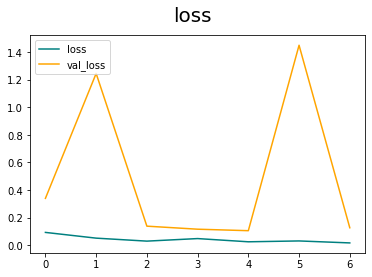

In [ ]:
fig = plt.figure()
plt.plot(results.history['loss'], color = 'teal', label='loss')
plt.plot(results.history['val_loss'], color = 'orange', label='val_loss')
fig.suptitle('loss' ,fontsize=20)
plt.legend(loc='upper left')
plt.show()

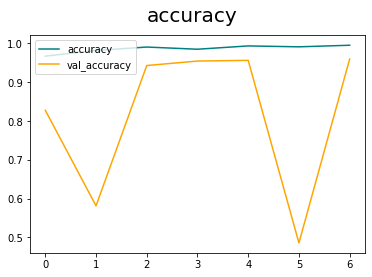

In [ ]:
fig = plt.figure()
plt.plot(results.history['accuracy'], color = 'teal', label='accuracy')
plt.plot(results.history['val_accuracy'], color = 'orange', label='val_accuracy')
fig.suptitle('accuracy' ,fontsize=20)
plt.legend(loc='upper left')
plt.show()

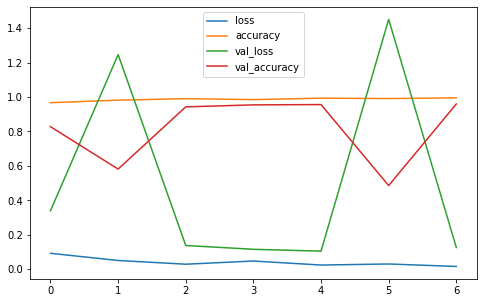

In [ ]:
pd.DataFrame(results.history).plot(figsize=(8,5))
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image 

In [ ]:
test_img = '/content/badb02245.jpg'

In [ ]:
imread(test_img).shape

(480, 640, 3)

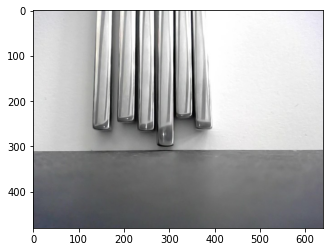

In [ ]:
plt.imshow(imread(test_img))

In [ ]:
my_test = image.load_img(test_img,target_size= image_shape)

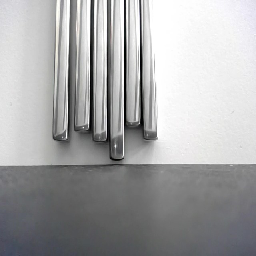

In [ ]:
my_test

In [ ]:
my_test_arr = image.img_to_array(my_test)

In [ ]:
my_test_arr.shape

(256, 256, 3)

In [ ]:
my_test_arr=np.expand_dims(my_test_arr,axis=0)

In [ ]:
my_test_arr.shape

(1, 256, 256, 3)

In [ ]:
model.predict(my_test_arr)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

In [ ]:
test_batches.class_indices

{'Bad Images': 0, 'Good images': 1}

In [ ]:
test_img2 = '/content/scenec00346.jpg'

In [ ]:
my_test2 = image.load_img(test_img2,target_size= image_shape)

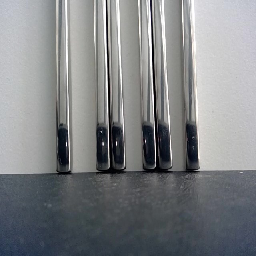

In [ ]:
my_test2

In [ ]:
my_test_arr2 = image.img_to_array(my_test2)

In [ ]:
my_test_arr2.shape

(256, 256, 3)

In [ ]:
my_test_arr2=np.expand_dims(my_test_arr2,axis=0)

In [ ]:
my_test_arr2.shape

(1, 256, 256, 3)

In [ ]:
model.predict(my_test_arr2)

1/1 [==============================] - 0s 16ms/step


array([[1.]], dtype=float32)